In [2]:
import numpy as np
import pandas as pd

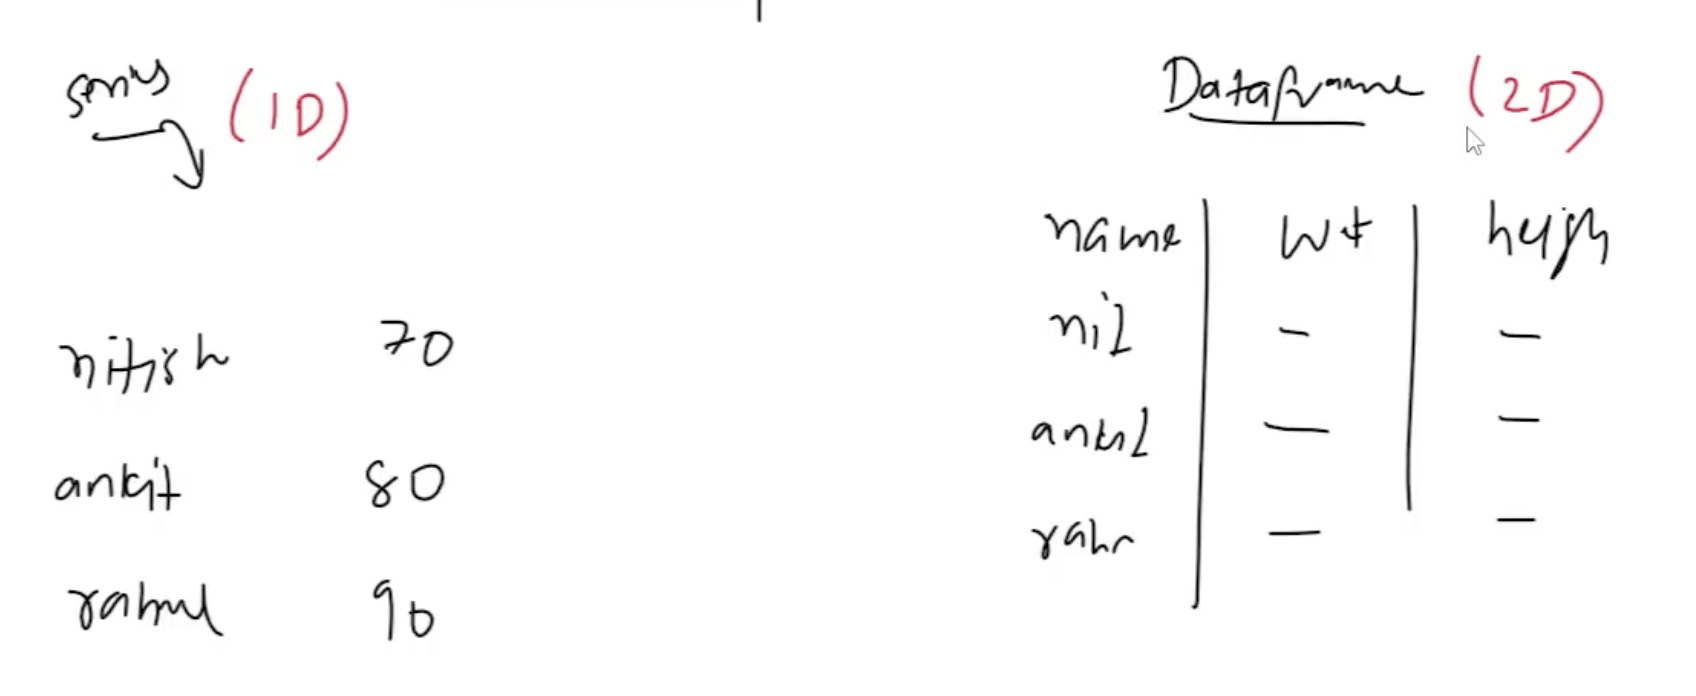

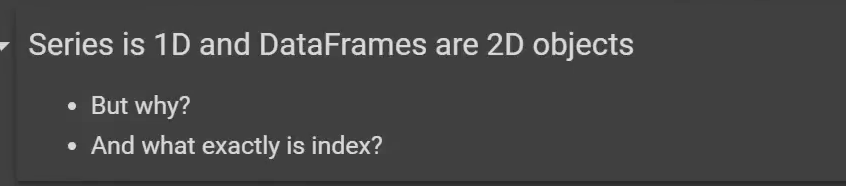

In [3]:
## in series to fetch an info you only need index name

## in dataframe to fetch an info you need two info - index name and col name

In [4]:
## can we have multiple index ? let's try out

index_val=[('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

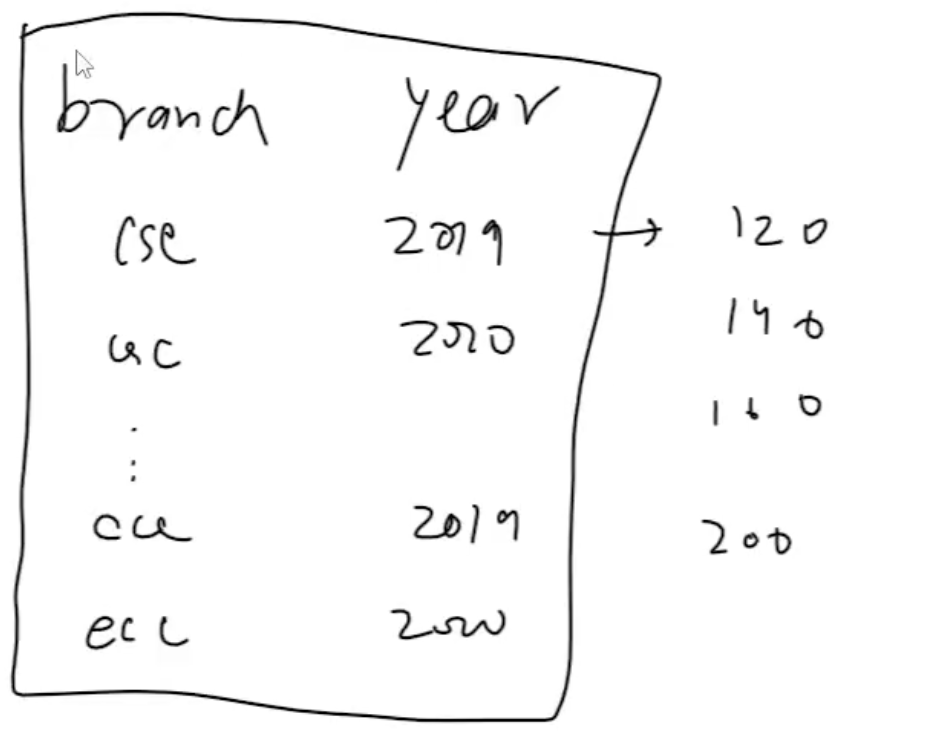

multindex series

In [5]:
a=pd.Series([1,2,3,4,5,6,7,8],index=index_val)
print(a)

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64


In [6]:
a[('cse',2022)]

np.int64(4)

In [7]:
a['cse']

## ek bhi aisa index nahi hai joh sirf cse hai 
## we cannot filter students on basis of branch only

KeyError: 'cse'

In [8]:
## the soln-> multiindex series (also known as hierarchical indexing )
## multiple index levels within a single index

In [9]:
## how to create a multi index object
## 1- pd.MultiIndex.from_tuples()
## 2- pd.MultiIndex.from_product()

index_val=[('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex=pd.MultiIndex.from_tuples(index_val)
print(multiindex) ## multiindex object

## putting 2d list
m=pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
print(m)

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )
MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )


In [10]:
## level inside multiindex object
multiindex.levels ## decoupled 

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [11]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [12]:
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [13]:
## creating a series with multiindex object

s=pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s


cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

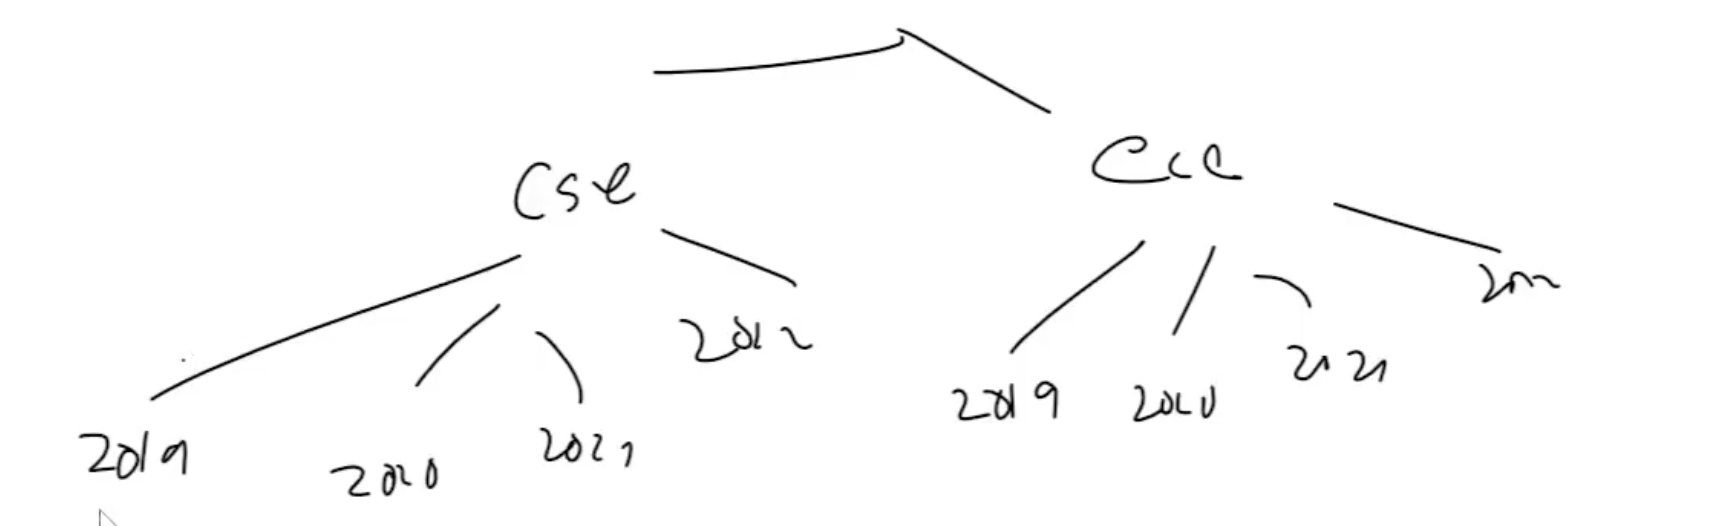

hierarchical indexing

In [14]:
## how to fetch items from such a series

s[('cse',2022)]

np.int64(4)

In [15]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [16]:
## a logical question to ask ? 
## what is the dimension of this multiindex series ? 
## answer- it is 2d (to fetch 4 i need two things branch and year)

In [17]:
## unstack: multiindex series->dataframe

df=s.unstack() ##andar wala index ko col mein convert kardiya 
df

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [18]:
## stack

df.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
## then what is the point of multiindex series ? 

## answer - using this i can represent higher dimension of data as series 

## 3d data -> 2d data display
## 10d data ->2d data display

## kitne bhi high dimension ka data ho apke pass ap usko series aur dataframe mein represent kara sakthe ho 

In [ ]:
## multiindex dataframe 

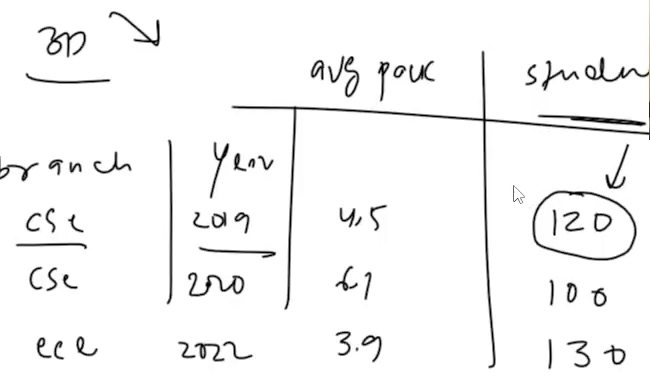

we need to give 3 info to fetch a value therefore 3d

In [19]:
branch_df1=pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16]
    ],
    index=multiindex,
    columns=['avg_pack','students']
)
branch_df1

avg_pack  students
cse 2019         1         2
    2020         3         4
    2021         5         6
    2022         7         8
ece 2019         9        10
    2020        11        12
    2021        13        14
    2022        15        16

In [ ]:
branch_df1.loc['cse']

,avg_pack,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df1['avg_pack'] ##multiindex series

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_pack, dtype: int64

In [ ]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

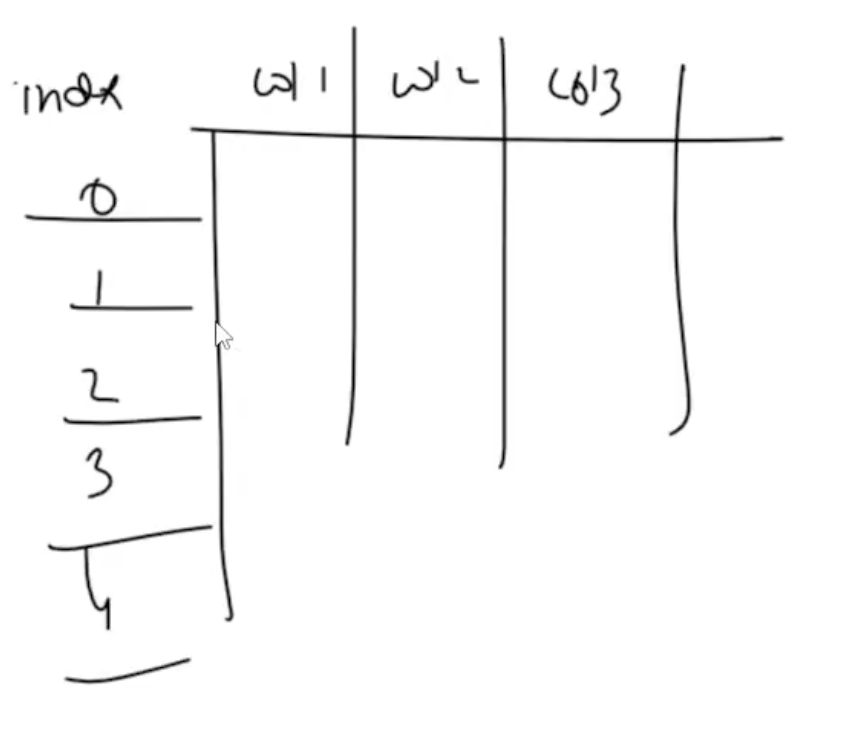


till now we treated index and col differently but honestly in deep level for pandas both are same thigns
bcz if we transpose it index becomes col and col becomes index

In [20]:
## multiindex df from col perspective 

branch_df2=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0]
    ],
    index=[2019,2020,2021,2022],
    columns=pd.MultiIndex.from_product([['delhi','mumbai'],['avg_pack','student']])
)
branch_df2
## 3d data represented using dataframe 

delhi           mumbai        
     avg_pack student avg_pack student
2019        1       2        0       0
2020        3       4        0       0
2021        5       6        0       0
2022        7       8        0       0

In [ ]:
branch_df2['delhi']

,avg_pack,student
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df2['mumbai']['avg_pack']

2019    0
2020    0
2021    0
2022    0
Name: avg_pack, dtype: int64

In [ ]:
branch_df2.loc[2019] ## multinidex series

delhi   avg_pack    1
        student     2
mumbai  avg_pack    0
        student     0
Name: 2019, dtype: int64

In [21]:
## multiindex in terms of both cols and index

branch_df3=pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0]
    ],
    index=multiindex,
    columns=pd.MultiIndex.from_product([['delhi','mumbai'],['avg_pack','student']])
)
branch_df3

## it is 4d 
## to fetch single item you need to give 4 values

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

MultiIndex series are Used over DataFrames Cause of Multiple reasons.

1. They are 1D  Thus takes much less resource than DataFrame

2. They are best for Data with Natural Heirarchies 

3. They are More Efficient 

4. They are used in Time series Data Analyssis

5. They provide a Cleaner Representation

6. They provide Flexibility in Slicing and Indexing

7. They provide Efficient Grouping and Aggregation

## Stacking and Unstacking

In [ ]:
branch_df1

avg_pack  students
cse 2019         1         2
    2020         3         4
    2021         5         6
    2022         7         8
ece 2019         9        10
    2020        11        12
    2021        13        14
    2022        15        16

In [ ]:
branch_df1.unstack() ## andar wala level (year wala ) woh row se col ban jayega 
## woh replace nahi karega existing col ko bajaye hirechary create hojayegi

avg_pack                students               
        2019 2020 2021 2022     2019 2020 2021 2022
cse        1    3    5    7        2    4    6    8
ece        9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().unstack() ##multindex series (3d)

avg_pack  2019  cse     1
                ece     9
          2020  cse     3
                ece    11
          2021  cse     5
                ece    13
          2022  cse     7
                ece    15
students  2019  cse     2
                ece    10
          2020  cse     4
                ece    12
          2021  cse     6
                ece    14
          2022  cse     8
                ece    16
dtype: int64

In [ ]:
branch_df1.unstack()

avg_pack                students               
        2019 2020 2021 2022     2019 2020 2021 2022
cse        1    3    5    7        2    4    6    8
ece        9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().stack() ## through stack ANDAR WALA col converts to index

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/2868048707.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack() ## through stack col converts to row


avg_pack  students
cse 2019         1         2
    2020         3         4
    2021         5         6
    2022         7         8
ece 2019         9        10
    2020        11        12
    2021        13        14
    2022        15        16

In [ ]:
## in series you cannot use stack()
branch_df1.unstack().stack().stack()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/1089046428.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_pack     1
           students     2
     2020  avg_pack     3
           students     4
     2021  avg_pack     5
           students     6
     2022  avg_pack     7
           students     8
ece  2019  avg_pack     9
           students    10
     2020  avg_pack    11
           students    12
     2021  avg_pack    13
           students    14
     2022  avg_pack    15
           students    16
dtype: int64

In [ ]:
branch_df2

delhi           mumbai        
     avg_pack student avg_pack student
2019        1       2        0       0
2020        3       4        0       0
2021        5       6        0       0
2022        7       8        0       0

In [ ]:
branch_df2.unstack()

delhi   avg_pack  2019    1
                  2020    3
                  2021    5
                  2022    7
        student   2019    2
                  2020    4
                  2021    6
                  2022    8
mumbai  avg_pack  2019    0
                  2020    0
                  2021    0
                  2022    0
        student   2019    0
                  2020    0
                  2021    0
                  2022    0
dtype: int64

In [ ]:
branch_df2.stack()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/3132666484.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()


delhi  mumbai
2019 avg_pack      1       0
     student       2       0
2020 avg_pack      3       0
     student       4       0
2021 avg_pack      5       0
     student       6       0
2022 avg_pack      7       0
     student       8       0

In [ ]:
branch_df2.stack().stack()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/2534568903.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  avg_pack  delhi     1
                mumbai    0
      student   delhi     2
                mumbai    0
2020  avg_pack  delhi     3
                mumbai    0
      student   delhi     4
                mumbai    0
2021  avg_pack  delhi     5
                mumbai    0
      student   delhi     6
                mumbai    0
2022  avg_pack  delhi     7
                mumbai    0
      student   delhi     8
                mumbai    0
dtype: int64

In [ ]:
branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [ ]:
branch_df3.unstack()

delhi                                         mumbai                 \
    avg_pack                student                avg_pack                  
        2019 2020 2021 2022    2019 2020 2021 2022     2019 2020 2021 2022   
cse        1    3    5    7       2    4    6    8        0    0    0    0   
ece        9   11   13   15      10   12   14   16        0    0    0    0   

                            
    student                 
       2019 2020 2021 2022  
cse       0    0    0    0  
ece       0    0    0    0

In [ ]:
branch_df3.unstack().unstack()

delhi   avg_pack  2019  cse     1
                        ece     9
                  2020  cse     3
                        ece    11
                  2021  cse     5
                        ece    13
                  2022  cse     7
                        ece    15
        student   2019  cse     2
                        ece    10
                  2020  cse     4
                        ece    12
                  2021  cse     6
                        ece    14
                  2022  cse     8
                        ece    16
mumbai  avg_pack  2019  cse     0
                        ece     0
                  2020  cse     0
                        ece     0
                  2021  cse     0
                        ece     0
                  2022  cse     0
                        ece     0
        student   2019  cse     0
                        ece     0
                  2020  cse     0
                        ece     0
                  2021  cse     0
              

In [ ]:
branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [ ]:
branch_df3.stack()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/4148153360.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack()


delhi  mumbai
cse 2019 avg_pack      1       0
         student       2       0
    2020 avg_pack      3       0
         student       4       0
    2021 avg_pack      5       0
         student       6       0
    2022 avg_pack      7       0
         student       8       0
ece 2019 avg_pack      9       0
         student      10       0
    2020 avg_pack     11       0
         student      12       0
    2021 avg_pack     13       0
         student      14       0
    2022 avg_pack     15       0
         student      16       0

In [ ]:
branch_df3.stack().stack()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3144/4023844418.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_pack  delhi      1
                     mumbai     0
           student   delhi      2
                     mumbai     0
     2020  avg_pack  delhi      3
                     mumbai     0
           student   delhi      4
                     mumbai     0
     2021  avg_pack  delhi      5
                     mumbai     0
           student   delhi      6
                     mumbai     0
     2022  avg_pack  delhi      7
                     mumbai     0
           student   delhi      8
                     mumbai     0
ece  2019  avg_pack  delhi      9
                     mumbai     0
           student   delhi     10
                     mumbai     0
     2020  avg_pack  delhi     11
                     mumbai     0
           student   delhi     12
                     mumbai     0
     2021  avg_pack  delhi     13
                     mumbai     0
           student   delhi     14
                     mumbai     0
     2022  avg_pack  delhi     15
              

## Working with multiindex dataframes

In [ ]:
## head and tail

branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [ ]:
branch_df3.head(5)

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0

In [ ]:
branch_df3.shape 

(8, 4)

In [ ]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   (delhi, avg_pack)   8 non-null      int64
 1   (delhi, student)    8 non-null      int64
 2   (mumbai, avg_pack)  8 non-null      int64
 3   (mumbai, student)   8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [ ]:
branch_df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   (delhi, avg_pack, 2019)   2 non-null      int64
 1   (delhi, avg_pack, 2020)   2 non-null      int64
 2   (delhi, avg_pack, 2021)   2 non-null      int64
 3   (delhi, avg_pack, 2022)   2 non-null      int64
 4   (delhi, student, 2019)    2 non-null      int64
 5   (delhi, student, 2020)    2 non-null      int64
 6   (delhi, student, 2021)    2 non-null      int64
 7   (delhi, student, 2022)    2 non-null      int64
 8   (mumbai, avg_pack, 2019)  2 non-null      int64
 9   (mumbai, avg_pack, 2020)  2 non-null      int64
 10  (mumbai, avg_pack, 2021)  2 non-null      int64
 11  (mumbai, avg_pack, 2022)  2 non-null      int64
 12  (mumbai, student, 2019)   2 non-null      int64
 13  (mumbai, student, 2020)   2 non-null      int64
 14  (mumbai, student, 2021)   2 non-null      int64

In [ ]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [ ]:
branch_df3.isnull()

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019    False   False    False   False
    2020    False   False    False   False
    2021    False   False    False   False
    2022    False   False    False   False
ece 2019    False   False    False   False
    2020    False   False    False   False
    2021    False   False    False   False
    2022    False   False    False   False

In [22]:
## extracting rows single
branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [25]:
branch_df3.loc[('cse',2022)]

delhi   avg_pack    7
        student     8
mumbai  avg_pack    0
        student     0
Name: (cse, 2022), dtype: int64

In [27]:
## multiple rows 

## i want to fetch 1st,3rd,5th row

branch_df3.loc[('cse',2019):('ece',2020):2]

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2021        5       6        0       0
ece 2019        9      10        0       0

In [28]:
## using iloc

branch_df3.iloc[0]

delhi   avg_pack    1
        student     2
mumbai  avg_pack    0
        student     0
Name: (cse, 2019), dtype: int64

In [29]:
branch_df3.iloc[0:5:2]

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2021        5       6        0       0
ece 2019        9      10        0       0

In [32]:
## extracting cols

branch_df3['delhi'] ##3D dataframe

avg_pack  student
cse 2019         1        2
    2020         3        4
    2021         5        6
    2022         7        8
ece 2019         9       10
    2020        11       12
    2021        13       14
    2022        15       16

In [34]:
## extracting both

branch_df3['delhi']['student'] ##2D dataframe

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: student, dtype: int64

In [36]:
## extracting multiple columns
## delhi student and mumbai avg package
branch_df3.iloc[:,1:3]

delhi   mumbai
         student avg_pack
cse 2019       2        0
    2020       4        0
    2021       6        0
    2022       8        0
ece 2019      10        0
    2020      12        0
    2021      14        0
    2022      16        0

In [38]:
## extracting both

branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,student,avg_pack
cse,2019,2,0
ece,2019,10,0


In [39]:
## sorting the index of a multiindex dataframe

branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [40]:
branch_df3.sort_index(ascending=False)

delhi           mumbai        
         avg_pack student avg_pack student
ece 2022       15      16        0       0
    2021       13      14        0       0
    2020       11      12        0       0
    2019        9      10        0       0
cse 2022        7       8        0       0
    2021        5       6        0       0
    2020        3       4        0       0
    2019        1       2        0       0

In [41]:
branch_df3.sort_index(ascending=[False,True])

delhi           mumbai        
         avg_pack student avg_pack student
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0

In [43]:
branch_df3.sort_index(level=1,ascending=False) ## sorting on basis of year

delhi           mumbai        
         avg_pack student avg_pack student
ece 2022       15      16        0       0
cse 2022        7       8        0       0
ece 2021       13      14        0       0
cse 2021        5       6        0       0
ece 2020       11      12        0       0
cse 2020        3       4        0       0
ece 2019        9      10        0       0
cse 2019        1       2        0       0

In [44]:
## multiindex dataframe(col) -> transpose  row ka col and col ka row 
branch_df3

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [45]:
branch_df3.transpose()

cse                 ece               
                2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_pack    1    3    5    7    9   11   13   15
       student     2    4    6    8   10   12   14   16
mumbai avg_pack    0    0    0    0    0    0    0    0
       student     0    0    0    0    0    0    0    0

In [47]:
## swaplevel() we can swap the level 

branch_df3
## i want to swap such that branch becomes inner index and year becomes outer index

delhi           mumbai        
         avg_pack student avg_pack student
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

In [48]:
branch_df3.swaplevel()

delhi           mumbai        
         avg_pack student avg_pack student
2019 cse        1       2        0       0
2020 cse        3       4        0       0
2021 cse        5       6        0       0
2022 cse        7       8        0       0
2019 ece        9      10        0       0
2020 ece       11      12        0       0
2021 ece       13      14        0       0
2022 ece       15      16        0       0

In [49]:
## on columns

branch_df3.swaplevel(axis=1)

avg_pack student avg_pack student
            delhi   delhi   mumbai  mumbai
cse 2019        1       2        0       0
    2020        3       4        0       0
    2021        5       6        0       0
    2022        7       8        0       0
ece 2019        9      10        0       0
    2020       11      12        0       0
    2021       13      14        0       0
    2022       15      16        0       0

## Long Vs Wide Data

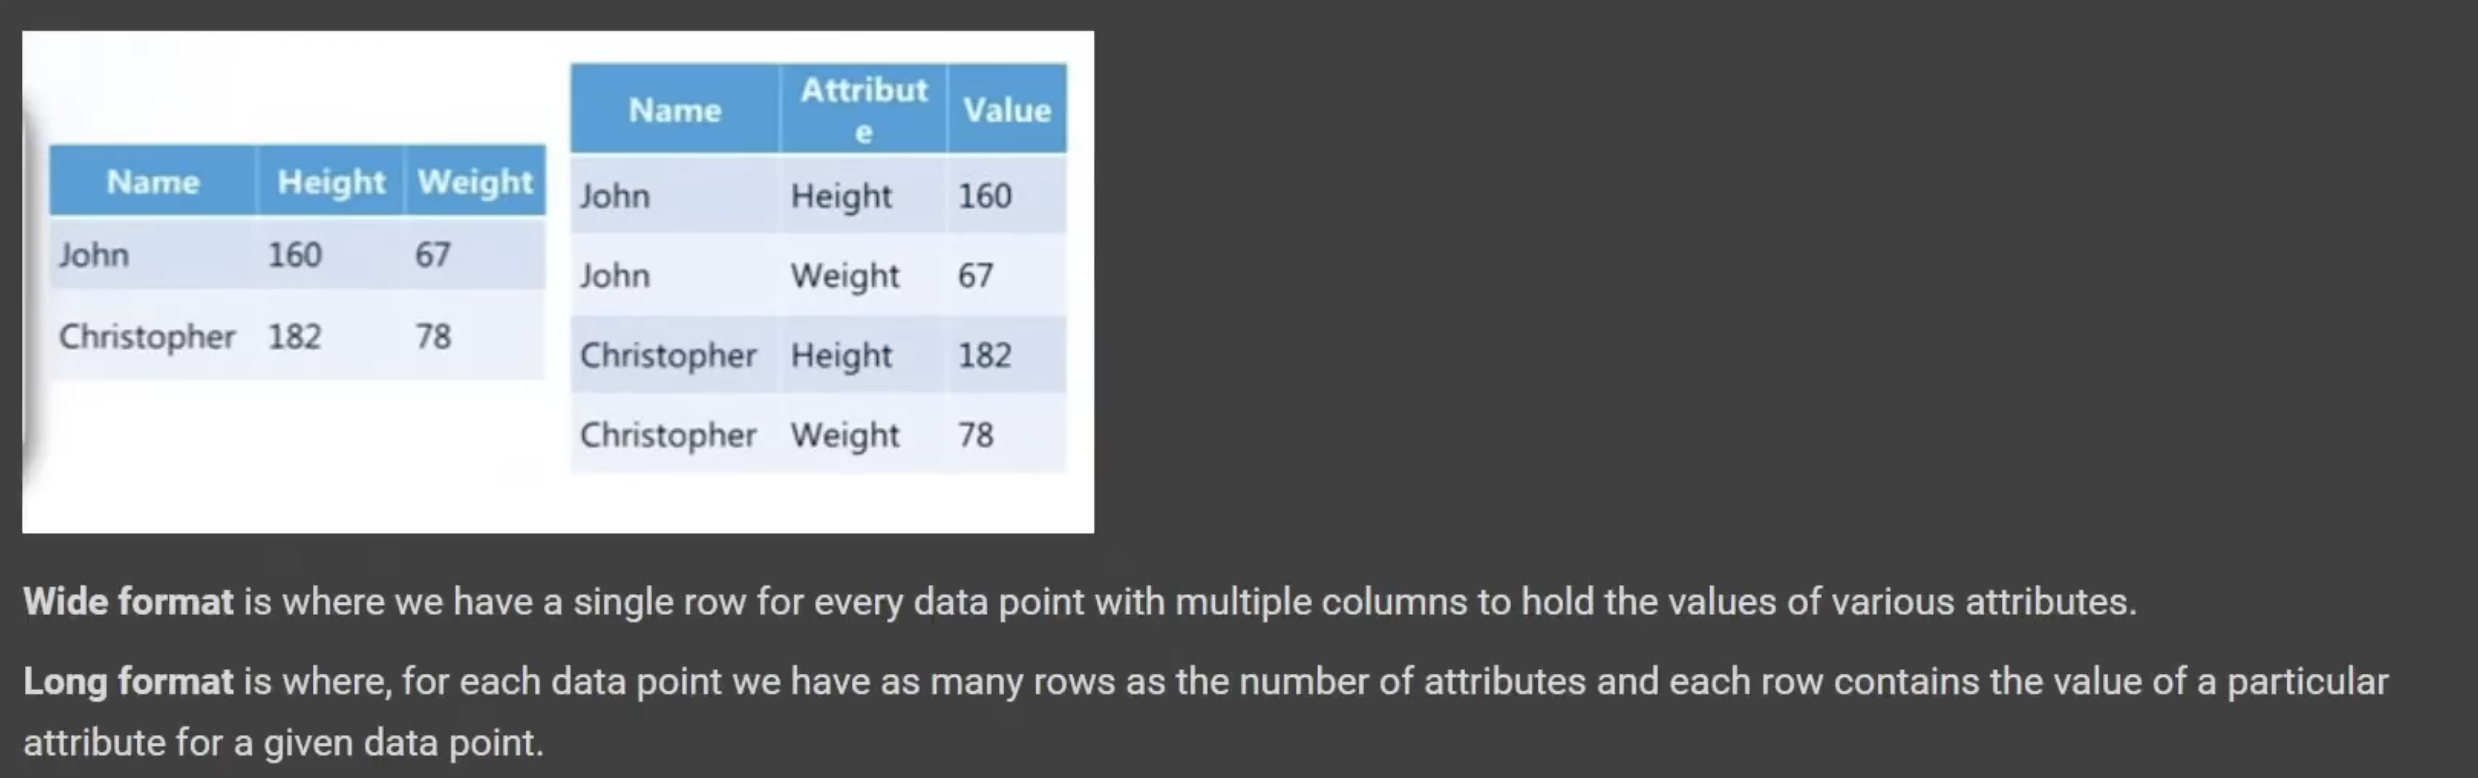

In [50]:
## melt:  wide data format -> long data format
## pivot: long data format -> wide data format

In [53]:
## melt

pd.DataFrame({'cse':[120]})

,cse
0,120


In [55]:
## col value converts to row 
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [56]:
## melt -> branch with year

pd.DataFrame({ 'cse':[120],'ece':[100],'mech':[50]})

,cse,ece,mech
0,120,100,50


In [58]:
pd.DataFrame({ 'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [60]:
d=pd.DataFrame({'branch':['cse','ece','mech'],
              '2020':[100,150,60],
              '2021':[120,100,40],
              '2022':[170,100,30]
              })
d

,branch,2020,2021,2022
0,cse,100,120,170
1,ece,150,100,100
2,mech,60,40,30


In [61]:
d.melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,100
8,2021,40
9,2022,170


In [63]:
d.melt(id_vars=['branch'],var_name='year',value_name='num_students') ## don't change branch to row
## to not include a col use "id_vars"

,branch,year,num_students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,100
5,mech,2021,40
6,cse,2022,170
7,ece,2022,100
8,mech,2022,30


In [84]:
confirm=pd.read_csv('/Users/priyanshugupta/Desktop/Python learning/datasets-session-21/time_series_covid19_confirmed_global.csv')
confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [83]:
death=pd.read_csv('/Users/priyanshugupta/Desktop/Python learning/datasets-session-21/time_series_covid19_deaths_global.csv')
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [69]:
death.shape
## there are 1000 columns -> wide format data 

(289, 1081)

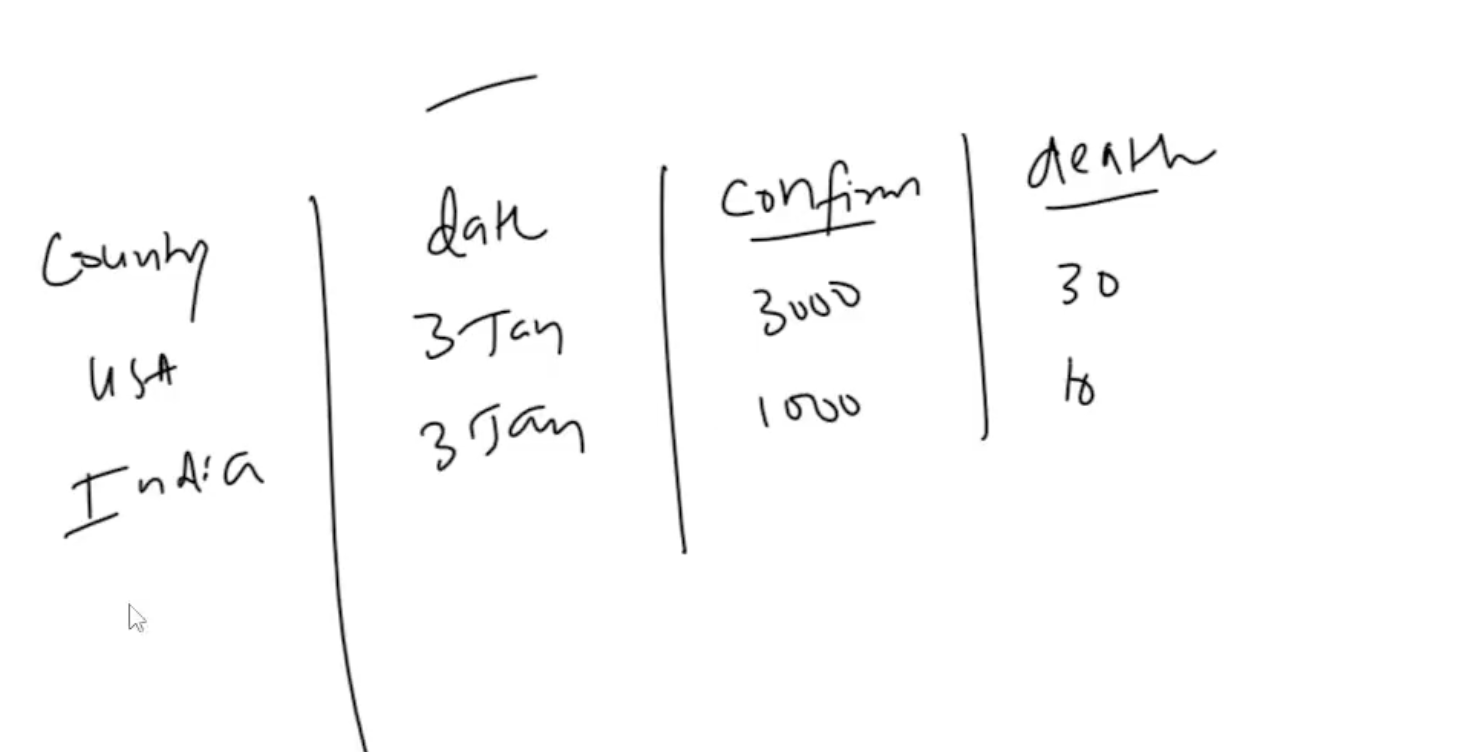

what i want

In [85]:
death=death.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='Date',value_name='num_deaths')
death

,Country/Region,Province/State,Lat,Long,Date,num_deaths
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,West Bank and Gaza,NaN,31.952200,35.233200,1/2/23,5708
311249,Winter Olympics 2022,NaN,39.904200,116.407400,1/2/23,0
311250,Yemen,NaN,15.552727,48.516388,1/2/23,2159
311251,Zambia,NaN,-13.133897,27.849332,1/2/23,4024


In [86]:
confirm=confirm.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='Date',value_name='num_cases')
confirm


,Country/Region,Province/State,Lat,Long,Date,num_cases
0,Afghanistan,NaN,33.939110,67.709953,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,West Bank and Gaza,NaN,31.952200,35.233200,1/2/23,703228
311249,Winter Olympics 2022,NaN,39.904200,116.407400,1/2/23,535
311250,Yemen,NaN,15.552727,48.516388,1/2/23,11945
311251,Zambia,NaN,-13.133897,27.849332,1/2/23,334661


In [ ]:
confirm.merge(death,on=['Country/Region','Province/State','Lat','Long','Date'],how='inner')

In [87]:
confirm.merge(death,on=['Country/Region','Province/State','Lat','Long','Date'],how='inner')[['Country/Region','Date','num_cases','num_deaths']]

,Country/Region,Date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


## Pivot Table

The Pivot table takes simple column wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns

In [90]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
## gender ke basis pe average total bill 
df.groupby('sex')[['total_bill']].mean()

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/2866871359.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [94]:
s=df.groupby(['sex','smoker'])[['total_bill']].mean()
s

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/2026623132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s=df.groupby(['sex','smoker'])[['total_bill']].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [95]:
s.unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [96]:
df.pivot_table(index='sex',columns='smoker',values='total_bill') ##default agg function is mean here 

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/1243499625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [97]:
## aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/3627826641.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [102]:
## all cols together
df.pivot_table(
    index='sex',
    columns='smoker',
    values=['size', 'tip', 'total_bill'],
    aggfunc='mean'
)

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/1343856501.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [104]:
## multidimensional 

df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/1031752656.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [105]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values=['total_bill','size','tip'],aggfunc={'total_bill':'sum','size':'mean','tip':'max' })

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/4000083872.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values=['total_bill','size','tip'],aggfunc={'total_bill':'sum','size':'mean','tip':'max' })


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [106]:
## margin
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)
## sum de raha All mein 

/var/folders/gg/f1jqwyw902s1lt078gd0wfdm0000gn/T/ipykernel_3449/773961199.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [108]:
## plotting graphs
df=pd.read_csv('/Users/priyanshugupta/Desktop/Python learning/datasets-session-22/expense_data.csv')
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [110]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [113]:
df['Date']=pd.to_datetime(df['Date'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [116]:
## to extract month

df['month']=df['Date'].dt.month_name()
df['month']

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: month, Length: 277, dtype: object

In [118]:
## i want to make relationship between category and month
df.pivot_table(index=['month'],columns='Category',values='INR',aggfunc='sum') ## Col category ke joh values the woh columns ban jayegne

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [120]:
df1=df.pivot_table(index=['month'],columns='Category',values='INR',aggfunc='sum',fill_value=0) ## Col category ke joh values the woh columns ban jayegne
df1

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month'>

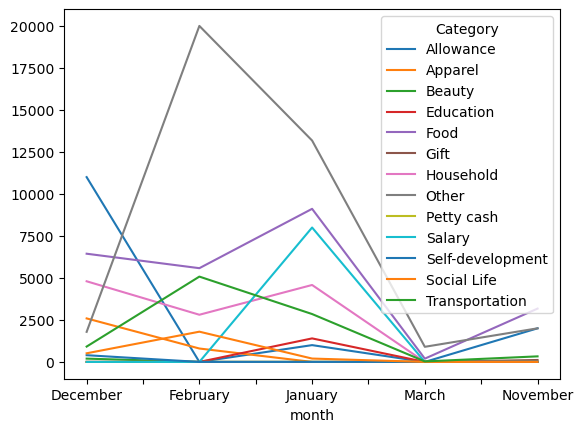

In [121]:
df1.plot()